# Partie 2 – Traitement de texte (Text Preprocessing)

## Objectifs

Nettoyer et transformer les tweets pour la modélisation afin de :
- Réduire la dimensionnalité du corpus
- Extraire une version épurée et utile du texte

## Étapes à suivre

### 1. Développement de la fonction de nettoyage

Écrire une fonction `clean_text` pour :
- Tokeniser un tweet
- Supprimer la ponctuation, les chiffres, les mots courts (< 3 lettres)
- Supprimer les stopwords
- Appliquer stemming ou lemmatisation
- Reconstituer un corpus nettoyé

### 2. Analyse du corpus nettoyé

Analyser :
- Le nombre total de tokens
- Le nombre de tokens uniques
- Le nombre de tokens apparaissant une seule fois
- Visualiser les tokens les plus fréquents (WordCloud)

### 3. Tests de validation

#### Validation de la fonction `clean_text`
- Nettoie correctement texte vide, ponctuation, chiffres, mots courts
- Vérification que tous les tokens ont plus de 2 lettres
- Vérification que les stopwords sont supprimés
- Test que le vocabulaire diminue bien après nettoyage
- Vérification de l'impact du stemming/lemmatisation

In [9]:
import pandas as pd

df = pd.read_csv('../../data/train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download required NLTK data (run this once)
nltk.download('stopwords')
nltk.download('punkt_tab')

def clean_text(text):
    # Convert to lowercase first
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation (keep only alphanumeric and spaces)
    text = re.sub(r'[^\w\s]', '', text)
    
    # # Tokenize the text
    # tokens = word_tokenize(text)
    
    # Get English stopwords
    stop_words = set(stopwords.words('english'))

    filtered_words = [word for word in text.split() if word not in stop_words and len(word) > 2]

    return filtered_words

[nltk_data] Downloading package stopwords to /home/lux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/lux/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
df_cleaned = df.copy()
df_cleaned['text'] = df_cleaned['text'].apply(clean_text)
df_cleaned

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgive]",1
1,4,NaN,NaN,"[forest, fire, near, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1
...,...,...,...,...,...
7608,10869,NaN,NaN,"[two, giant, cranes, holding, bridge, collapse...",1
7609,10870,NaN,NaN,"[control, wild, fires, california, even, north...",1
7610,10871,NaN,NaN,"[utckm, volcano, hawaii]",1
7611,10872,NaN,NaN,"[police, investigating, ebike, collided, car, ...",1


In [13]:
# Improved version of clean_text function
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def clean_text_improved(text):
    """
    Improved text cleaning function with stemming and better preprocessing
    """
    if pd.isna(text) or not text.strip():
        return []
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions and hashtags (but keep the text after #)
    text = re.sub(r'@\w+', '', text)  # Remove mentions completely
    text = re.sub(r'#', '', text)    # Remove # but keep the word
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Get stopwords
    stop_words = set(stopwords.words('english'))
    
    # Initialize stemmer
    stemmer = PorterStemmer()
    
    # Filter and stem
    cleaned_tokens = []
    for token in tokens:
        # Skip if stopword or too short
        if token not in stop_words and len(token) > 2:
            # Apply stemming
            stemmed_token = stemmer.stem(token)
            cleaned_tokens.append(stemmed_token)
    
    return cleaned_tokens

# Compare the two functions
print("COMPARISON: Original vs Improved Function")
print("=" * 60)

test_examples = [
    "The building is on fire! Call 911 now!!!",
    "I am running to escape the fires and disasters",
    "RT @user: Major earthquake hits the city #emergency #disaster",
    "Buildings collapsed after the earthquake hit",
]

for i, example in enumerate(test_examples, 1):
    original_result = clean_text(example)
    improved_result = clean_text_improved(example)
    
    print(f"\nExample {i}: '{example}'")
    print(f"Original:  {original_result} ({len(original_result)} tokens)")
    print(f"Improved:  {improved_result} ({len(improved_result)} tokens)")
    print("-" * 50)

COMPARISON: Original vs Improved Function

Example 1: 'The building is on fire! Call 911 now!!!'
Original:  ['building', 'fire', 'call'] (3 tokens)
Improved:  ['build', 'fire', 'call'] (3 tokens)
--------------------------------------------------

Example 2: 'I am running to escape the fires and disasters'
Original:  ['running', 'escape', 'fires', 'disasters'] (4 tokens)
Improved:  ['run', 'escap', 'fire', 'disast'] (4 tokens)
--------------------------------------------------

Example 3: 'RT @user: Major earthquake hits the city #emergency #disaster'
Original:  ['major', 'earthquake', 'hits', 'city', 'emergency', 'disaster'] (6 tokens)
Improved:  ['major', 'earthquak', 'hit', 'citi', 'emerg', 'disast'] (6 tokens)
--------------------------------------------------

Example 4: 'Buildings collapsed after the earthquake hit'
Original:  ['buildings', 'collapsed', 'earthquake', 'hit'] (4 tokens)
Improved:  ['build', 'collaps', 'earthquak', 'hit'] (4 tokens)
---------------------------------

### Note: The stemming will help the model recognize that "fire", "fires", "firing" are essentially the same concept.

In [14]:
# Let's analyze what makes tweets predictable
# First, let's look at common words in disaster vs non-disaster tweets

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud

# Get words from disaster tweets (target=1) and non-disaster tweets (target=0)
disaster_words = []
non_disaster_words = []

for idx, row in df.iterrows():
    words = clean_text_improved(row['text'])
    if row['target'] == 1:
        disaster_words.extend(words)
    else:
        non_disaster_words.extend(words)

# Get most common words for each category
disaster_common = Counter(disaster_words).most_common(20)
non_disaster_common = Counter(non_disaster_words).most_common(20)

print("Most common words in DISASTER tweets:")
for word, count in disaster_common:
    print(f"{word}: {count}")

print("\nMost common words in NON-DISASTER tweets:")
for word, count in non_disaster_common:
    print(f"{word}: {count}")

Most common words in DISASTER tweets:
fire: 272
bomb: 187
kill: 161
news: 141
amp: 135
flood: 122
disast: 122
via: 121
california: 115
crash: 115
year: 112
suicid: 112
polic: 109
train: 109
peopl: 106
attack: 106
home: 105
famili: 105
like: 103
evacu: 102

Most common words in NON-DISASTER tweets:
like: 308
get: 223
amp: 209
new: 170
one: 137
love: 124
bodi: 119
bag: 112
time: 107
day: 103
video: 102
would: 101
scream: 100
want: 99
make: 99
via: 99
see: 98
peopl: 94
burn: 94
got: 93


/tmp/ipykernel_66188/2035849102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=disaster_words_df.head(10), x='count', y='word', ax=ax1, palette='Reds_r')
/tmp/ipykernel_66188/2035849102.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=non_disaster_words_df.head(10), x='count', y='word', ax=ax2, palette='Blues_r')


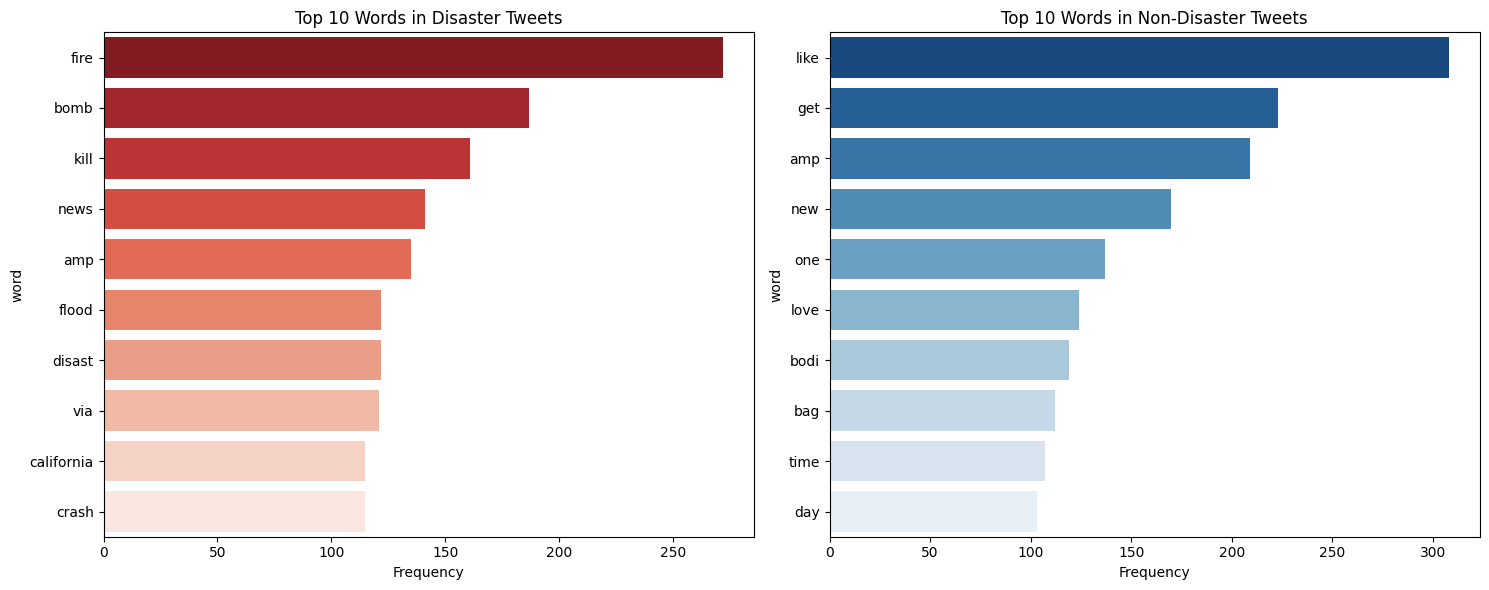

In [15]:
# Visualize the most distinctive words
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot disaster words
disaster_words_df = pd.DataFrame(disaster_common, columns=['word', 'count'])
sns.barplot(data=disaster_words_df.head(10), x='count', y='word', ax=ax1, palette='Reds_r')
ax1.set_title('Top 10 Words in Disaster Tweets')
ax1.set_xlabel('Frequency')

# Plot non-disaster words
non_disaster_words_df = pd.DataFrame(non_disaster_common, columns=['word', 'count'])
sns.barplot(data=non_disaster_words_df.head(10), x='count', y='word', ax=ax2, palette='Blues_r')
ax2.set_title('Top 10 Words in Non-Disaster Tweets')
ax2.set_xlabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
# export cleaned dataset

df_cleaned.to_csv('../../data/cleaned_train.csv', index=False)